In [2]:
from pgmpy.models import MarkovModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [19]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(month_number):
    """Returns the conditions probabilities of money market and every other ESP product.
    Compute the probabilities distribution of money market = yes and moeny market = 0 no, then take the
    complement to find the corresponding probabilities for the other class.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as days NOT week. need to conver to weeks interally in the function"""
    # money market bonus conditional probability distributions
#     mmb1_and_cmma1_dist = stats.norm(loc = 5, scale=2)
#     mmb1_and_cmma0_dist = stats.norm(loc = 86, scale=20)
#     mmb1_and_checking1_dist = stats.norm(loc = 25, scale=10)
#     mmb1_and_checking0_dist = stats.norm(loc = 5, scale=1)
#     mmb1_and_cm1_dist = stats.norm(loc = 9, scale=5)
#     mmb1_and_cm0_dist = stats.norm(loc = 8, scale=21)
#     mmb1_and_fx1_dist = stats.norm(loc = 15, scale=55)
#     mmb1_and_fx0_dist = stats.norm(loc = 7, scale=55)
#     mmb1_and_loc1_dist = stats.norm(loc = 10, scale=25)
#     mmb1_and_loc0_dist = stats.norm(loc = 1.2, scale=21)
#     mmb1_and_es1_dist = stats.norm(loc = .7, scale=95)
#     mmb1_and_es0_dist = stats.norm(loc = 8, scale=55)
######## TAKE HISTORICAL PROBABILITIES FOR EACH TIME STEP#######

#     mmb1_dist = stats.norm(loc = 5, scale=2)
#     mmb1_prob = mmb1_dist.pdf(month_number)
#     mmb0_prob =  1 - mmb1_prob
    
#     cmma1_dist = stats.norm(loc = 5, scale=1)
#     cmma1_prob = cmma1_dist.pdf(month_number)
#     cmma0_prob = 1-cmma1_prob
    
#     checking1_dist = stats.norm(loc = 4, scale=11)
#     checking1_prob = checking1_dist.pdf(month_number)
#     checking0_prob = 1 - checking1_prob 
#     checking_prob = poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])
    
    
#     cm1_dist = stats.norm(loc = 20, scale=5)
#     cm1_prob = cm1_dist.pdf(month_number)
#     cm0_prob = 1 - cm1_prob
    
    
#     fx1_dist = stats.norm(loc = 15, scale=2)
#     fx1_prob = fx1_dist.pdf(month_number)
#     fx0_prob = 1 - fx1_prob
    
#     loc1_dist = stats.norm(loc = 10, scale=15)
#     loc1_prob = loc1_dist.pdf(month_number)
#     loc0_prob = 1 - loc1_prob
    
#     es1_dist = stats.norm(loc = .7, scale=15)
#     es1_prob = es1_dist.pdf(month_number)
#     es0_prob = 1 - es1_prob
    
    
    
    # find the probabilities given a month number for money market bonus
    cm1_cmma1 = np.poly1d([  1.03321999e-10 , -2.36101833e-07  , 1.61336407e-04  , 1.32697341e-02])
    cm1_cmma0 = np.poly1d([ -1.11032471e-07 ,  9.80667291e-04] )
    cm0_cmma1 = np.poly1d([  1.94497208e-08 , -3.05831421e-05 ,  1.90635299e-02] )
    cm0_cmma0 = np.poly1d([ -1.03321999e-10 ,  2.36101833e-07 , -1.61336407e-04  , 9.86730266e-01])
    
    mmb1_cmma1 = np.poly1d([ -2.49399499e-09 ,  7.64780317e-06 ,  1.50803699e-03])
    mmb1_cmma0 = np.poly1d([  7.73310095e-07 ,  1.24055702e-03])
    mmb0_cmma1 = np.poly1d([  6.51295155e-11 , -1.40819306e-07 ,  8.54277051e-05 ,  3.48649903e-02])
    mmb0_cmma0 = np.poly1d([  2.49399499e-09 , -7.64780317e-06 ,  9.98491963e-01])
    
    mmb1_cm1 = np.poly1d([ -2.49399499e-09  , 7.64780317e-06  , 1.50803699e-03])
    mmb1_cm0 = np.poly1d([ -9.58716194e-07 ,  1.98761081e-03])
    mmb0_cm1 = np.poly1d([  9.15998393e-11 , -2.29507281e-07  , 1.66177021e-04  , 1.52754569e-02])
    mmb0_cm0 = np.poly1d([ -3.25794697e-06 ,  9.97027047e-01])
    
    mmb1_fx1 = np.poly1d( [ 1.12133453e-08 , -1.20076007e-05 ,  2.83252654e-03])
    mmb1_fx0 = np.poly1d([  5.34216010e-09 , -3.94702569e-06 ,  4.13773910e-03])
    mmb0_fx1 = np.poly1d([  4.90141015e-11 , -9.97423811e-08 ,  5.69362936e-05  , 1.40412872e-02])
    mmb0_fx0 = np.poly1d([ -2.75224220e-11 ,  4.94432583e-08 , -2.36664676e-05 ,  1.00153733e+00])
    
    mmb1_loc1 = np.poly1d([ -5.94207659e-08 ,  2.42814243e-04])
    mmb1_loc0 = np.poly1d([ -5.67690683e-08 ,  1.77608621e-04])
    mmb0_loc1 = np.poly1d([  5.33744586e-06 ,  1.50967555e-04])
    mmb0_loc0 = np.poly1d([  5.94207659e-08 ,  9.99757186e-01])
    
    mmb1_es1 = np.poly1d([ -2.86383980e-08 ,  4.12226348e-05])
    mmb1_es0 = np.poly1d([ -1.55802827e-09 ,  2.36848986e-06  ,-1.23183494e-04])
    mmb0_es1 = np.poly1d([  6.08966851e-09 , -7.56089717e-06  , 4.31382896e-03])
    mmb0_es0 = np.poly1d([ -6.08966851e-09 ,  7.56089717e-06  , 9.95686171e-01])

    mmb1_checking1 = np.poly1d([  3.34930222e-11 , -7.62322454e-08 ,  6.03750177e-05 ,  8.80863247e-03] )
    mmb1_checking0 = np.poly1d([ -3.07013270e-08  , 3.08206409e-05] )
    mmb0_checking1 = np.poly1d([  3.85018721e-10 , -9.72598704e-07 ,  3.57633216e-04  , 5.66241396e-01] )
    mmb0_checking0 = np.poly1d([ -3.34930222e-11 ,  7.62322454e-08 , -6.03750177e-05 ,  9.91191368e-01] )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([  1.03321999e-10  -2.36101833e-07   1.61336407e-04   1.32697341e-02])
    cmma1_cm0 = np.poly1([ -1.11032471e-07   9.80667291e-04])
    cmma0_cm1 = np.poly1d([  1.94497208e-08  -3.05831421e-05   1.90635299e-02])
    cmma0_cm0 = np.poly1d([ -1.03321999e-10   2.36101833e-07  -1.61336407e-04   9.86730266e-01])
    
    
    

    
    # return the probabilities in the form of a dictionary
    money_market_conditional_probabilities = {}
    money_market_conditional_probabilities['mmb1_cmma1'] = mmb1_cmma1(month_number)
    money_market_conditional_probabilities['mmb1_cmma0'] = mmb1_cmma0(month_number)
    money_market_conditional_probabilities['mmb0_cmma1'] = mmb0_cmma1(month_number)
    money_market_conditional_probabilities['mmb0_cmma0'] = mmb0_cmma0(month_number)
    
    money_market_conditional_probabilities['mmb1_checking1'] = mmb1_checking1(month_number)
    money_market_conditional_probabilities['mmb1_checking0'] = mmb1_checking0(month_number)
    money_market_conditional_probabilities['mmb0_checking1'] = mmb0_checking1(month_number)
    money_market_conditional_probabilities['mmb0_checking0'] = mmb0_checking0(month_number)
    
    money_market_conditional_probabilities['mmb1_cm1'] = mmb1_cm1(month_number)
    money_market_conditional_probabilities['mmb1_cm0'] = mmb1_cm0(month_number)
    money_market_conditional_probabilities['mmb0_cm1'] = mmb0_cm1(month_number)
    money_market_conditional_probabilities['mmb0_cm0'] = mmb0_cm0(month_number)
    
    money_market_conditional_probabilities['mmb1_fx1'] = mmb1_fx1(month_number)
    money_market_conditional_probabilities['mmb1_fx0'] = mmb1_fx0(month_number)
    money_market_conditional_probabilities['mmb0_fx1'] = mmb0_fx1(month_number)
    money_market_conditional_probabilities['mmb0_fx0'] = mmb0_fx0(month_number)
    
    money_market_conditional_probabilities['mmb1_loc1'] = mmb1_loc1(month_number)
    money_market_conditional_probabilities['mmb1_loc0'] = mmb1_loc0(month_number)
    money_market_conditional_probabilities['mmb0_loc1'] = mmb0_loc1(month_number)
    money_market_conditional_probabilities['mmb0_loc0'] = mmb0_loc0(month_number)
    
    money_market_conditional_probabilities['mmb1_es1'] = mmb1_es1(month_number)
    money_market_conditional_probabilities['mmb1_es0'] = mmb1_es0(month_number)
    money_market_conditional_probabilities['mmb0_es1'] = mmb0_es1(month_number)
    money_market_conditional_probabilities['mmb0_es0'] = mmb0_es0(month_number)
    
    
    return money_market_conditional_probabilities
    
    
    

    

In [20]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(0) 



In [21]:
dict_of_esp_money_market_joint_prob

{'mmb0_checking0': 0.99119136799999996,
 'mmb0_checking1': 0.56624139600000001,
 'mmb0_cm0': 0.997027047,
 'mmb0_cm1': 0.0152754569,
 'mmb0_cmma0': 0.99849196299999998,
 'mmb0_cmma1': 0.034864990300000002,
 'mmb0_es0': 0.99568617100000001,
 'mmb0_es1': 0.0043138289600000001,
 'mmb0_fx0': 1.0015373299999999,
 'mmb0_fx1': 0.0140412872,
 'mmb0_loc0': 0.99975718599999996,
 'mmb0_loc1': 0.00015096755500000001,
 'mmb1_checking0': 3.0820640900000002e-05,
 'mmb1_checking1': 0.0088086324699999993,
 'mmb1_cm0': 0.0019876108100000001,
 'mmb1_cm1': 0.0015080369900000001,
 'mmb1_cmma0': 0.0012405570199999999,
 'mmb1_cmma1': 0.0015080369900000001,
 'mmb1_es0': -0.00012318349399999999,
 'mmb1_es1': 4.12226348e-05,
 'mmb1_fx0': 0.0041377391000000001,
 'mmb1_fx1': 0.0028325265400000002,
 'mmb1_loc0': 0.00017760862100000001,
 'mmb1_loc1': 0.000242814243}

In [27]:
model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep')])#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def ESP_Markov_Model_Joint_Prob(esp_money_market_conditional_probabilities,day_n_one_time= None,
                                      product_name = None,range_of_days=365,evidence_=None):
    """Returns the probability of having a given ESP product during a certain month. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product"""
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    if day_n_one_time != None:
        dict_of_esp_money_market_cpd = esp_money_market_conditional_probabilities(day_n_one_time) 

        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                        cardinality=[2, 2],
                        values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                    dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                    dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                    dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                    dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                    dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                    dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

#             factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
#                                         dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])

#             factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[.4, .6, .3, .7])

#             factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                                 cardinality=[2, 2],
#                                 values=[.2, .8, .9, .1])

#             factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.3, .7, .4, .6])

#             factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.1, .9, .4, .6])

        model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                           factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
        belief_propagation = BeliefPropagation(model)
        if evidence_ == None:
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'],
                                                      evidence=evidence_)
            return 
        else:


            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
    else:
        for day_n_loop in range(range_of_days):
            dict_of_esp_money_market_cpd = esp_money_market_conditional_probabilities(day_n_loop) 

            factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                        dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
            factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                        dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
            factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                        dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
            factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                        dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
            factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                        dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
            factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                        dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

#             factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
#                                         dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])

#             factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[.4, .6, .3, .7])

#             factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                                 cardinality=[2, 2],
#                                 values=[.2, .8, .9, .1])

#             factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.3, .7, .4, .6])

#             factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.1, .9, .4, .6])

            model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                               factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
            belief_propagation = BeliefPropagation(model)
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'],
                                                      evidence=evidence_)

            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])

    plt.figure(figsize=(15,8))
    plt.plot([_ for _ in range( range_of_days)], prob_mmb,label='mmb')
    plt.plot([_ for _ in range( range_of_days)], prob_cmma,label='cmma')
    plt.plot([_ for _ in range( range_of_days)], prob_fx,label='fx')
    plt.plot([_ for _ in range( range_of_days)], prob_loc,label='loc')
    plt.plot([_ for _ in range( range_of_days)], prob_es,label='es')
    plt.plot([_ for _ in range( range_of_days)], prob_checking,label='checking')
    plt.legend()
    
        
        
# fig = plt.plot([i for i in range(50)],have_money_market,label='have money_market_bonus')
# fig.title('Haev money market bonus')

                # factor_cmma_checking,factor_cmma_cm,factor_cmma_fx,factor_cmma_loc,factor_cmma_es )

/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/pgmpy/factors/Factor.py:659: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values


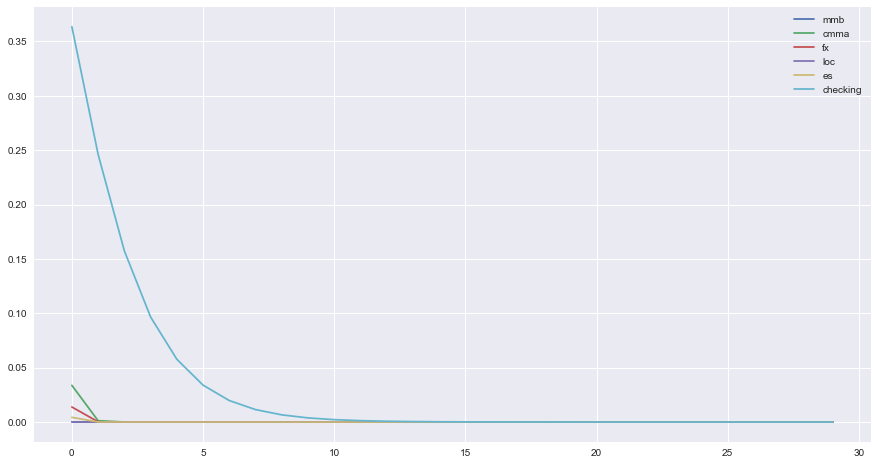

In [28]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_days=30)

In [249]:
model.get_local_independencies()

(collateral_mma _|_ fx_products, enterprise_sweep, checking_usd, letters_of_credit, cash_management | money_market_bonus)
(checking_usd _|_ fx_products, enterprise_sweep, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(cash_management _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, letters_of_credit | money_market_bonus)
(fx_products _|_ enterprise_sweep, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(letters_of_credit _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, cash_management | money_market_bonus)
(enterprise_sweep _|_ fx_products, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)

In [252]:
from IPython.display import Image
print(factor_mmb_checking)

╒══════════════════════╤════════════════╤════════════════════════════════════════╕
│ money_market_bonus   │ checking_usd   │   phi(money_market_bonus,checking_usd) │
╞══════════════════════╪════════════════╪════════════════════════════════════════╡
│ money_market_bonus_0 │ checking_usd_0 │                                 1.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_0 │ checking_usd_1 │                                 0.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_0 │                                 0.9978 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_1 │                                 0.0022 │
╘══════════════════════╧════════════════╧════════════════════════════════════════╛


In [220]:
belief_propagation = BeliefPropagation(model)

In [221]:
belief = belief_propagation.query(variables=['collateral_mma'])

In [237]:
belief['collateral_mma'].values

array([  1.00000000e+00,   1.35741448e-53])

In [301]:
factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                            dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                            dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                            dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                            dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                            dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                            dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

# factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .5, .5])

# factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.4, .6, .3, .7])

# factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                     cardinality=[2, 2],
#                     values=[.2, .8, .9, .1])

# factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.3, .7, .4, .6])

# factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .4, .6])

model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                   factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
belief_propagation = BeliefPropagation(model)
tes = belief_propagation.query(variables=['cash_management','enterprise_sweep','money_market_bonus'],
                              evidence={'checking_usd':0})

In [302]:
print(model)

In [303]:
tes['cash_management'].values

array([  1.00000000e+000,   1.23750423e-166])

In [304]:
tes['enterprise_sweep'].values

array([  1.00000000e+000,   7.45345104e-161])

In [305]:
tes['money_market_bonus'].values

array([ 0.73019158,  0.26980842])

In [714]:
test_markov = np.array([[.9,.05,.05],
                       [.2,.7,.1],
                       [.03,.27,.7]])

In [726]:
np.linalg.matrix_power(test_markov,15)

array([[ 0.57189067,  0.25095874,  0.17715059],
       [ 0.56098602,  0.25837906,  0.18063492],
       [ 0.5491393 ,  0.26628979,  0.1845709 ]])